In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [4]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [5]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [5]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(907, 27)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [8]:
df.drop(["estimated_generation_gwh","wepp_id","other_fuel1","other_fuel2"],axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                861 non-null    float64
 6   longitude               861 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   other_fuel3             0 non-null      float64
 9   commissioning_year      527 non-null    float64
 10  owner                   342 non-null    object 
 11  source                  907 non-null    object 
 12  url                     907 non-null    object 
 13  geolocation_source      888 non-null    object 
 14  year_of_capacity_data   519 non-null    fl

In [10]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel3               907
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       907
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_gwh_2019       907
generation_data_source    458
dtype: int64

In [11]:
df["name"].nunique()

907

In [12]:
df["year_of_capacity_data"].nunique()

1

In [13]:
df.drop(["name","url"],axis=1,inplace=True)

In [14]:
df["geolocation_source"].nunique()

3

In [15]:
df["geolocation_source"].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [19]:
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0],inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   gppd_idnr               907 non-null    object 
 3   capacity_mw             907 non-null    float64
 4   latitude                861 non-null    float64
 5   longitude               861 non-null    float64
 6   primary_fuel            907 non-null    object 
 7   other_fuel3             0 non-null      float64
 8   commissioning_year      527 non-null    float64
 9   owner                   342 non-null    object 
 10  source                  907 non-null    object 
 11  geolocation_source      907 non-null    object 
 12  year_of_capacity_data   519 non-null    float64
 13  generation_gwh_2013     0 non-null      float64
 14  generation_gwh_2014     398 non-null    fl

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   gppd_idnr               907 non-null    object 
 3   capacity_mw             907 non-null    float64
 4   latitude                861 non-null    float64
 5   longitude               861 non-null    float64
 6   primary_fuel            907 non-null    object 
 7   other_fuel3             0 non-null      float64
 8   commissioning_year      527 non-null    float64
 9   owner                   342 non-null    object 
 10  source                  907 non-null    object 
 11  geolocation_source      907 non-null    object 
 12  year_of_capacity_data   519 non-null    float64
 13  generation_gwh_2013     0 non-null      float64
 14  generation_gwh_2014     398 non-null    fl

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   gppd_idnr               907 non-null    object 
 3   capacity_mw             907 non-null    float64
 4   latitude                861 non-null    float64
 5   longitude               861 non-null    float64
 6   primary_fuel            907 non-null    object 
 7   other_fuel3             0 non-null      float64
 8   commissioning_year      527 non-null    float64
 9   owner                   342 non-null    object 
 10  source                  907 non-null    object 
 11  geolocation_source      907 non-null    object 
 12  year_of_capacity_data   519 non-null    float64
 13  generation_gwh_2013     0 non-null      float64
 14  generation_gwh_2014     398 non-null    fl

In [22]:
df.fillna(df.median()[0],inplace=True)

C:\Users\AM\AppData\Local\Temp\ipykernel_10888\2491074977.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median()[0],inplace=True)


In [23]:
df.isnull().sum()

country                   0
country_long              0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel3               0
commissioning_year        0
owner                     0
source                    0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
dtype: int64

In [24]:
df["source"].nunique()

191

In [25]:
df["geolocation_source"].nunique()

3

In [26]:
df.drop(["country","country_long"],axis=1,inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gppd_idnr               907 non-null    object 
 1   capacity_mw             907 non-null    float64
 2   latitude                907 non-null    float64
 3   longitude               907 non-null    float64
 4   primary_fuel            907 non-null    object 
 5   other_fuel3             907 non-null    float64
 6   commissioning_year      907 non-null    float64
 7   owner                   907 non-null    object 
 8   source                  907 non-null    object 
 9   geolocation_source      907 non-null    object 
 10  year_of_capacity_data   907 non-null    float64
 11  generation_gwh_2013     907 non-null    float64
 12  generation_gwh_2014     907 non-null    float64
 13  generation_gwh_2015     907 non-null    float64
 14  generation_gwh_2016     907 non-null    fl

In [28]:
df.drop(["gppd_idnr","other_fuel3"],axis=1,inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             907 non-null    float64
 1   latitude                907 non-null    float64
 2   longitude               907 non-null    float64
 3   primary_fuel            907 non-null    object 
 4   commissioning_year      907 non-null    float64
 5   owner                   907 non-null    object 
 6   source                  907 non-null    object 
 7   geolocation_source      907 non-null    object 
 8   year_of_capacity_data   907 non-null    float64
 9   generation_gwh_2013     907 non-null    float64
 10  generation_gwh_2014     907 non-null    float64
 11  generation_gwh_2015     907 non-null    float64
 12  generation_gwh_2016     907 non-null    float64
 13  generation_gwh_2017     907 non-null    float64
 14  generation_gwh_2018     907 non-null    fl

In [30]:
df.drop(["owner"],axis=1,inplace=True)

In [31]:
df.drop(["generation_data_source"],axis=1,inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   capacity_mw            907 non-null    float64
 1   latitude               907 non-null    float64
 2   longitude              907 non-null    float64
 3   primary_fuel           907 non-null    object 
 4   commissioning_year     907 non-null    float64
 5   source                 907 non-null    object 
 6   geolocation_source     907 non-null    object 
 7   year_of_capacity_data  907 non-null    float64
 8   generation_gwh_2013    907 non-null    float64
 9   generation_gwh_2014    907 non-null    float64
 10  generation_gwh_2015    907 non-null    float64
 11  generation_gwh_2016    907 non-null    float64
 12  generation_gwh_2017    907 non-null    float64
 13  generation_gwh_2018    907 non-null    float64
 14  generation_gwh_2019    907 non-null    float64
dtypes: flo

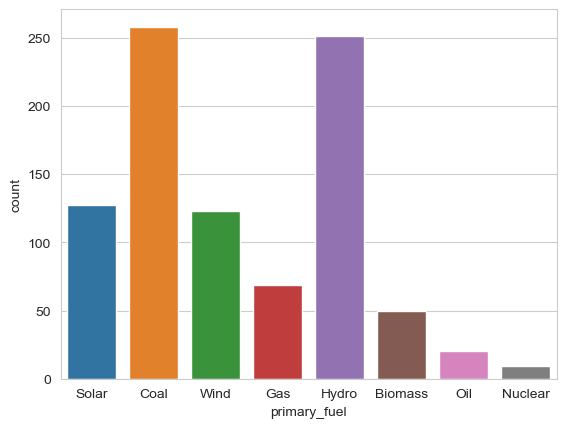

In [33]:
sns.set_style("whitegrid")
sns.countplot(x="primary_fuel",data=df)
plt.show()

In [34]:
dfcorr=df.corr()

C:\Users\AM\AppData\Local\Temp\ipykernel_10888\3112470342.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfcorr=df.corr()


<Axes: >

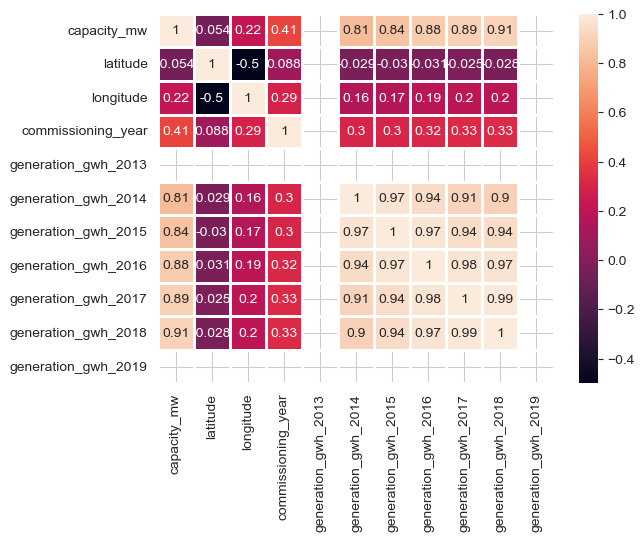

In [46]:
sns.heatmap(dfcorr,annot=True,linewidth=1)

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2013'>

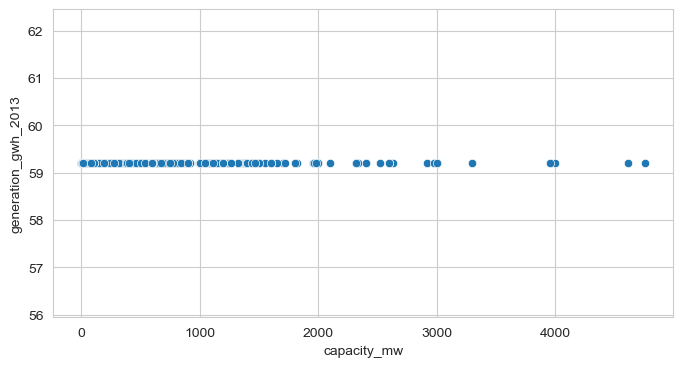

In [35]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="capacity_mw",y="generation_gwh_2013",data=df)

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2014'>

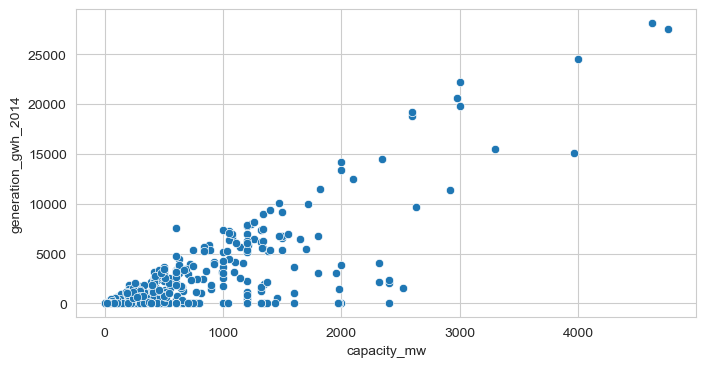

In [36]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="capacity_mw",y="generation_gwh_2014",data=df)

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2015'>

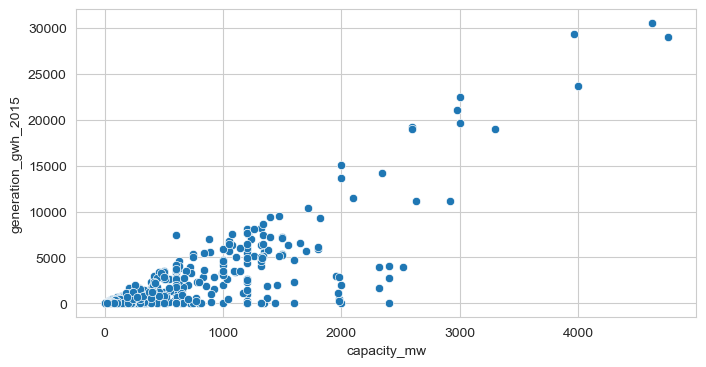

In [37]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="capacity_mw",y="generation_gwh_2015",data=df)

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2016'>

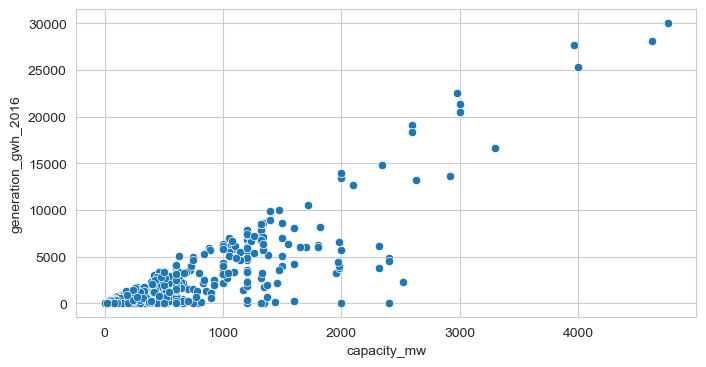

In [38]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="capacity_mw",y="generation_gwh_2016",data=df)

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2017'>

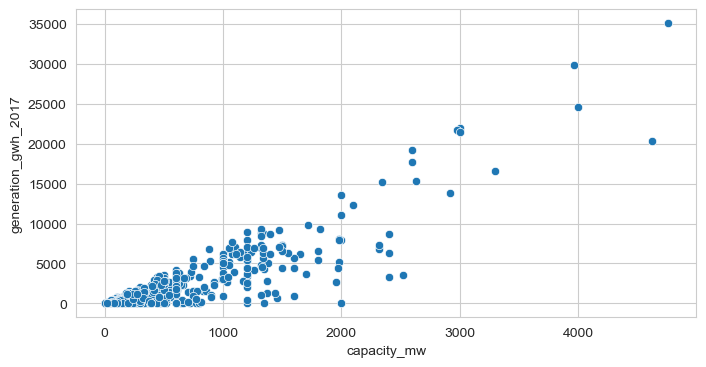

In [39]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="capacity_mw",y="generation_gwh_2017",data=df)

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2018'>

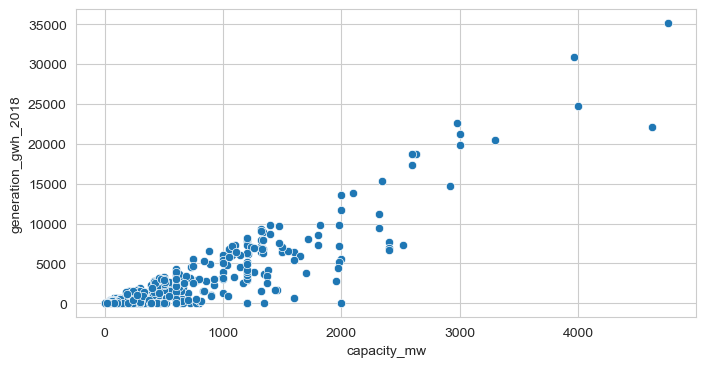

In [40]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="capacity_mw",y="generation_gwh_2018",data=df)

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2019'>

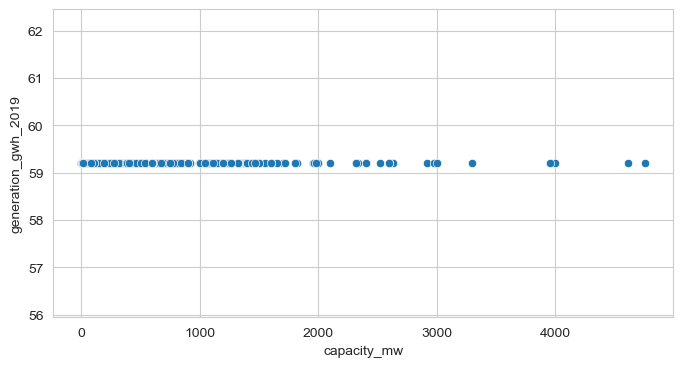

In [53]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="capacity_mw",y="generation_gwh_2019",data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2013'>

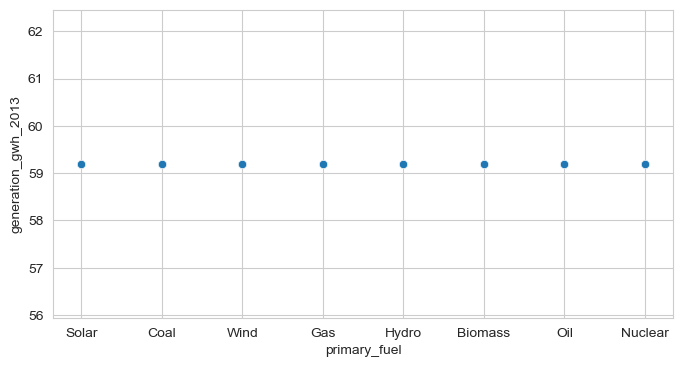

In [41]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="primary_fuel",y="generation_gwh_2013",data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2014'>

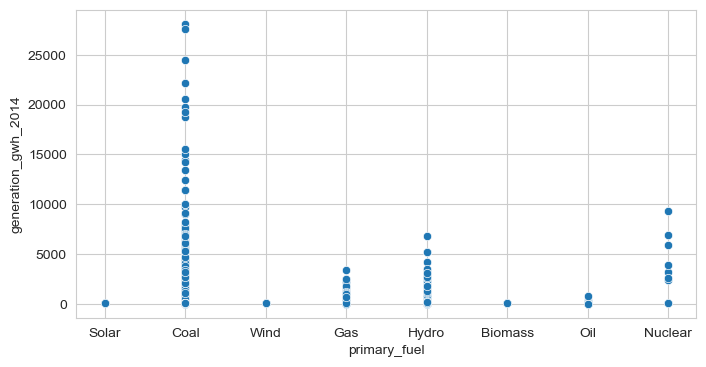

In [42]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="primary_fuel",y="generation_gwh_2014",data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2015'>

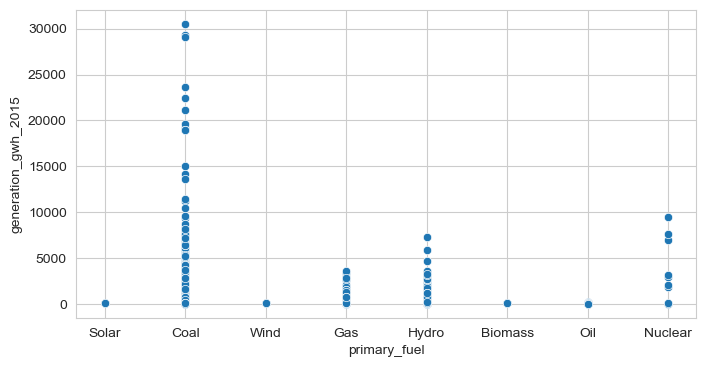

In [58]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="primary_fuel",y="generation_gwh_2015",data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2016'>

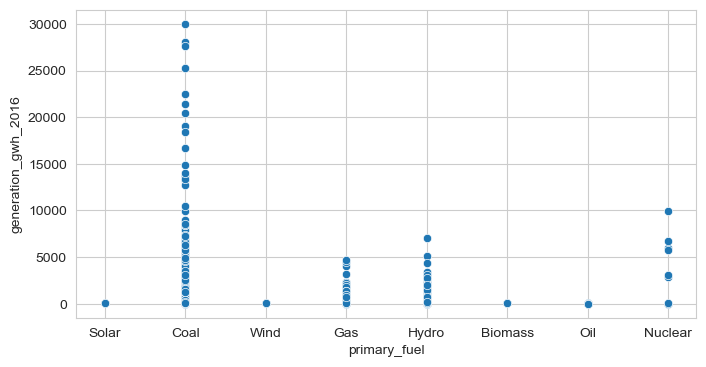

In [59]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="primary_fuel",y="generation_gwh_2016",data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2017'>

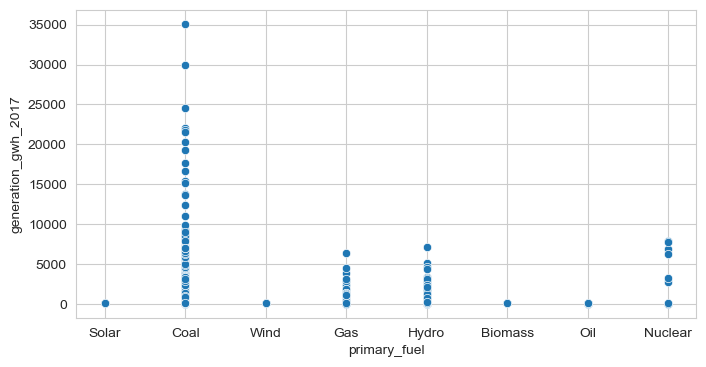

In [60]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="primary_fuel",y="generation_gwh_2017",data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2018'>

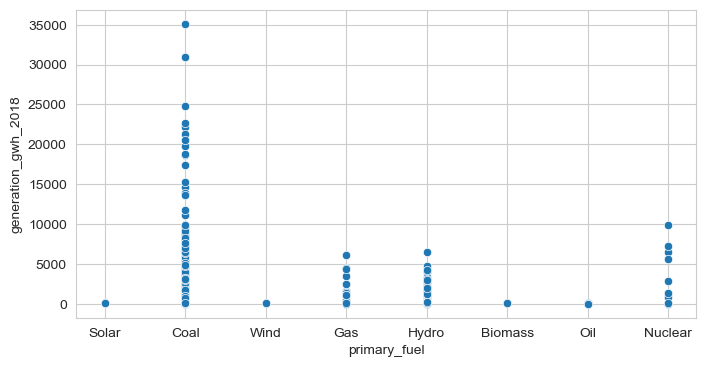

In [43]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="primary_fuel",y="generation_gwh_2018",data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2019'>

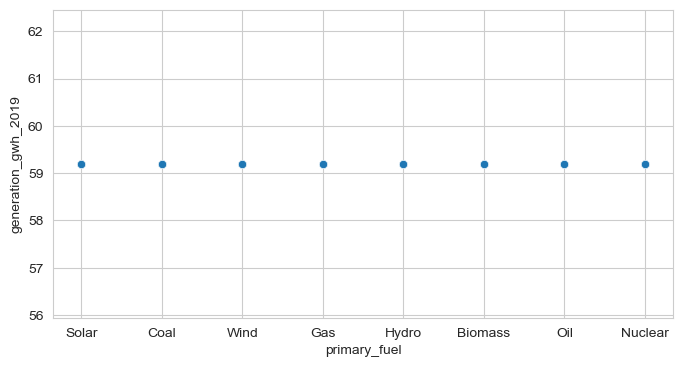

In [62]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="primary_fuel",y="generation_gwh_2019",data=df)

<Axes: xlabel='primary_fuel', ylabel='latitude'>

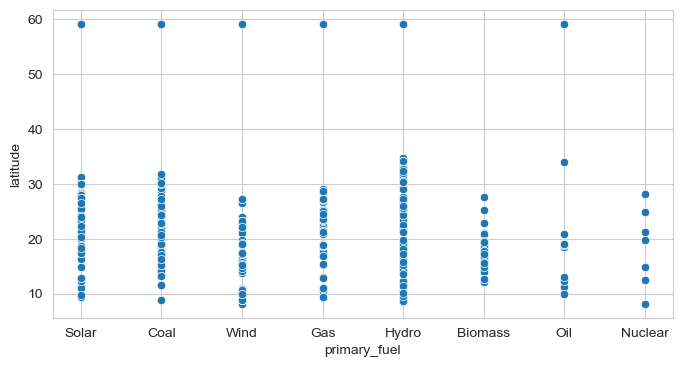

In [63]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="primary_fuel",y="latitude",data=df)

<Axes: xlabel='capacity_mw', ylabel='primary_fuel'>

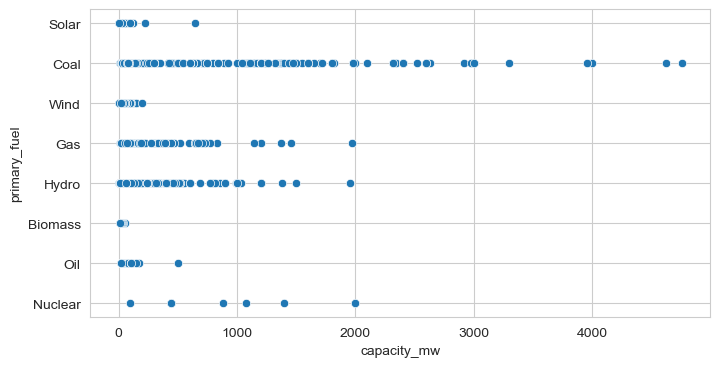

In [66]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="capacity_mw",y="primary_fuel",data=df)

<Axes: xlabel='primary_fuel', ylabel='capacity_mw'>

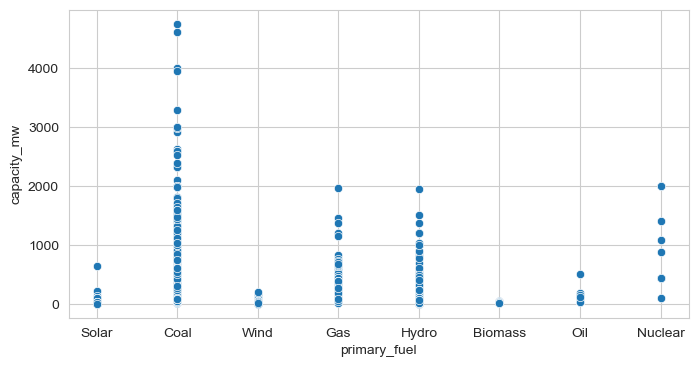

In [67]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="primary_fuel",y="capacity_mw",data=df)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   907 non-null    object 
 7   generation_gwh_2013  907 non-null    float64
 8   generation_gwh_2014  907 non-null    float64
 9   generation_gwh_2015  907 non-null    float64
 10  generation_gwh_2016  907 non-null    float64
 11  generation_gwh_2017  907 non-null    float64
 12  generation_gwh_2018  907 non-null    float64
 13  generation_gwh_2019  907 non-null    float64
dtypes: float64(11), object(3)
memory usage: 99.3+ KB


In [70]:
df["geolocation_source"].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [71]:
df["primary_fuel"].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [44]:
import pickle
from scipy.stats import zscore
import os
from sklearn.svm import SVR
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from pandas.api.types import CategoricalDtype
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV


In [45]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [46]:
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [47]:
encoder=LabelEncoder()
df["primary_fuel"]=encoder.fit_transform(df["primary_fuel"])
df["geolocation_source"]=encoder.fit_transform(df["geolocation_source"])
df["source"]=encoder.fit_transform(df["source"])

In [48]:
df["geolocation_source"].unique()

array([1, 2, 0])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   capacity_mw            907 non-null    float64
 1   latitude               907 non-null    float64
 2   longitude              907 non-null    float64
 3   primary_fuel           907 non-null    int32  
 4   commissioning_year     907 non-null    float64
 5   source                 907 non-null    int32  
 6   geolocation_source     907 non-null    int32  
 7   year_of_capacity_data  907 non-null    float64
 8   generation_gwh_2013    907 non-null    float64
 9   generation_gwh_2014    907 non-null    float64
 10  generation_gwh_2015    907 non-null    float64
 11  generation_gwh_2016    907 non-null    float64
 12  generation_gwh_2017    907 non-null    float64
 13  generation_gwh_2018    907 non-null    float64
 14  generation_gwh_2019    907 non-null    float64
dtypes: flo

In [50]:
z=np.abs(zscore(df[["generation_gwh_2013","generation_gwh_2014","generation_gwh_2015","generation_gwh_2017","generation_gwh_2016","generation_gwh_2018","generation_gwh_2019","capacity_mw"]]))
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
       209, 209, 209, 209, 209, 209, 308, 308, 308, 308, 308, 308, 363,
       364, 364, 364, 364, 364, 364, 375, 482, 482, 493, 493, 493, 493,
       493, 493, 494, 494, 494, 494, 494, 494, 532, 623, 648, 648, 648,
       648, 648, 648, 657, 657, 657, 657, 657, 657, 695, 695, 695, 695,
       695, 695, 721, 721, 721, 721, 721, 724, 724, 724, 724, 724, 726,
       726, 726, 726, 726, 726, 767, 786, 786, 786, 786, 786, 786, 788,
       808, 808, 808, 808, 808, 808, 880, 880, 880, 880, 880, 880],
      dtype=int64), array([2, 3, 4, 5, 7, 1, 2, 3, 4, 5, 7, 7, 1, 1, 2, 3, 4, 5, 7, 1, 2, 3,
       4, 5, 7, 7, 1, 2, 3, 4, 5, 7, 7, 5, 7, 1, 2, 3, 4, 5, 7, 1, 2, 3,
       4, 5, 7, 1, 1, 1, 2, 3, 4, 5, 7, 1, 2, 3, 4, 5, 7, 1, 2, 3, 4, 5,
       7, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 7, 7, 1, 2, 3, 4,
       5, 7, 7, 1, 2, 3, 4, 5, 7, 1, 2, 3, 4, 5, 7], dtype=int64))


In [56]:
z=np.abs(zscore(df[["generation_gwh_2013","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","generation_gwh_2018","generation_gwh_2019","capacity_mw"]]))
threshold=3
df1=df[(z<3).all(axis=1)]

print("shape of Dataframe before removing outlier:",df.shape)
print("shape of dataframe after removing outlier:",df1.shape)
print("percentage of data loss post outlier remove",(df.shape[0]-df1.shape[0]*100))

shape of Dataframe before removing outlier: (907, 15)
shape of dataframe after removing outlier: (0, 15)
percentage of data loss post outlier remove 907


In [57]:
df=df1.copy()

In [58]:
df.shape

(0, 15)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   capacity_mw            0 non-null      float64
 1   latitude               0 non-null      float64
 2   longitude              0 non-null      float64
 3   primary_fuel           0 non-null      int32  
 4   commissioning_year     0 non-null      float64
 5   source                 0 non-null      int32  
 6   geolocation_source     0 non-null      int32  
 7   year_of_capacity_data  0 non-null      float64
 8   generation_gwh_2013    0 non-null      float64
 9   generation_gwh_2014    0 non-null      float64
 10  generation_gwh_2015    0 non-null      float64
 11  generation_gwh_2016    0 non-null      float64
 12  generation_gwh_2017    0 non-null      float64
 13  generation_gwh_2018    0 non-null      float64
 14  generation_gwh_2019    0 non-null      float64
dtypes: float64(12), in

C:\Users\AM\AppData\Local\Temp\ipykernel_10888\49810396.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i[1]],color="g")
C:\Users\AM\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
C:\Users\AM\AppData\Local\Temp\ipykernel_10888\49810396.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions

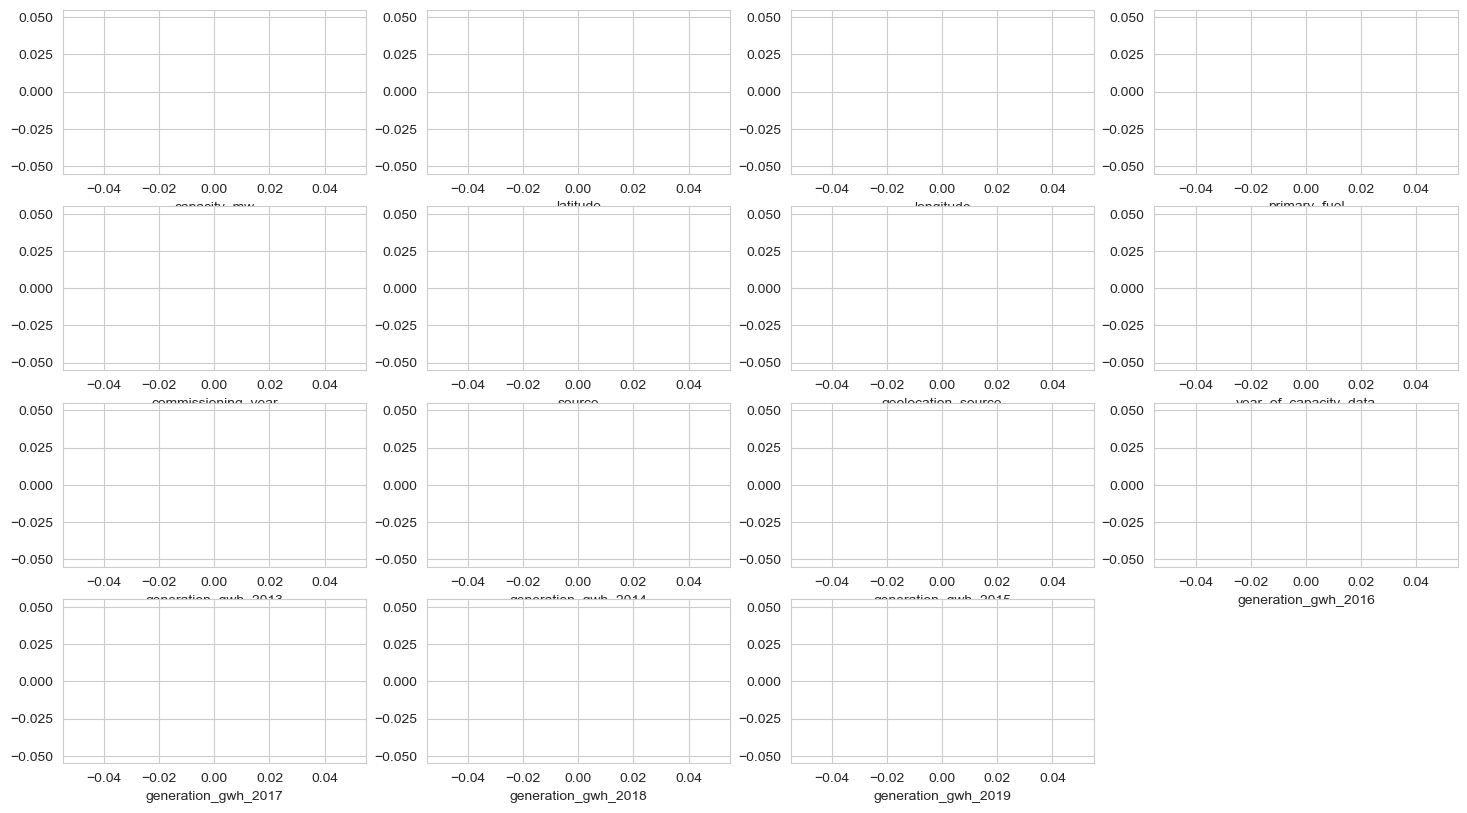

In [61]:
plt.figure(figsize=(18,20))
for i in enumerate(df):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color="g")

In [62]:
df.skew()

capacity_mw             NaN
latitude                NaN
longitude               NaN
primary_fuel            NaN
commissioning_year      NaN
source                  NaN
geolocation_source      NaN
year_of_capacity_data   NaN
generation_gwh_2013     NaN
generation_gwh_2014     NaN
generation_gwh_2015     NaN
generation_gwh_2016     NaN
generation_gwh_2017     NaN
generation_gwh_2018     NaN
generation_gwh_2019     NaN
dtype: float64